<img src='./pictures/laliga.png'>

In [221]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [222]:
laliga = pd.read_csv("./datasets/laliga.csv")
laliga.loc[laliga['Home Team Goals']>laliga['Away Team Goals'], 'Winner'] = 0
laliga.loc[laliga['Home Team Goals']<laliga['Away Team Goals'], 'Winner'] = 1
laliga.loc[laliga['Home Team Goals']==laliga['Away Team Goals'], 'Winner'] = 2 # tie
laliga.head()

,year,Home Team,Away Team,Home Team Goals,Away Team Goals,Winner
0,2014,MALAGA,ATHLETIC,1,0,0.0
1,2014,SEVILLA FC,VALENCIA,1,1,2.0
2,2014,GRANADA,DEPORTIVO,2,1,0.0
3,2014,ALMERIA,ESPANYOL,1,1,2.0
4,2014,EIBAR,REAL SOCIEDAD,1,0,0.0


In [223]:
# home team wins
laliga.loc[laliga['Winner'] == 0 , 'Home Team Points'] = 3
laliga.loc[laliga['Winner'] == 0 , 'Away Team Points'] = 0

# away team wins
laliga.loc[laliga['Winner'] == 1 , 'Home Team Points'] = 0
laliga.loc[laliga['Winner'] == 1 , 'Away Team Points'] = 3

# tie
laliga.loc[laliga['Winner'] == 2 , 'Home Team Points'] = 1
laliga.loc[laliga['Winner'] == 2 , 'Away Team Points'] = 1


laliga.head()

,year,Home Team,Away Team,Home Team Goals,Away Team Goals,Winner,Home Team Points,Away Team Points
0,2014,MALAGA,ATHLETIC,1,0,0.0,3.0,0.0
1,2014,SEVILLA FC,VALENCIA,1,1,2.0,1.0,1.0
2,2014,GRANADA,DEPORTIVO,2,1,0.0,3.0,0.0
3,2014,ALMERIA,ESPANYOL,1,1,2.0,1.0,1.0
4,2014,EIBAR,REAL SOCIEDAD,1,0,0.0,3.0,0.0


## Season 2019-2020

### The Winnerrrrrr
<img src='./pictures/real_madrid.png'>

In [224]:
final_points_home = laliga[laliga['year']==2019].groupby(by='Home Team').agg({'Home Team Points':'sum'}).reset_index()
final_points_away = laliga[laliga['year']==2019].groupby(by='Away Team').agg({'Away Team Points':'sum'}).reset_index()
final_points = final_points_home.merge(final_points_away, left_on='Home Team', right_on='Away Team', how='left')
final_points['points'] = final_points['Home Team Points'] + final_points['Away Team Points']
final_points = final_points[['Home Team', 'points']]
final_points.rename({'Home Team':'Team'})
final_points = final_points.sort_values(by =['points'], ascending=False)
final_points

,Home Team,points
14,REAL MADRID,87.0
3,BARCELONA,82.0
2,ATLETICO MADRID,70.0
16,SEVILLA FC,70.0
19,VILLARREAL,60.0
15,REAL SOCIEDAD,56.0
8,GRANADA,56.0
7,GETAFE,54.0
17,VALENCIA,53.0
12,OSASUNA,52.0


# Who will win ? Real Madrid vs Athletic (Castilla vs Bascos)

In [225]:
castilla_vs_bascos = laliga[ ((laliga['Away Team']== 'REAL MADRID') & (laliga['Home Team']== 'ATHLETIC')) | ((laliga['Home Team']== 'REAL MADRID') & (laliga['Away Team']== 'ATHLETIC'))]
castilla_vs_bascos = castilla_vs_bascos[["year","Home Team", "Away Team", 'Winner']]


castilla_vs_bascos

,year,Home Team,Away Team,Winner
69,2014,REAL MADRID,ATHLETIC,0.0
252,2014,ATHLETIC,REAL MADRID,0.0
426,2015,ATHLETIC,REAL MADRID,1.0
611,2015,REAL MADRID,ATHLETIC,0.0
849,2016,REAL MADRID,ATHLETIC,0.0
1032,2016,ATHLETIC,REAL MADRID,1.0
1274,2017,ATHLETIC,REAL MADRID,2.0
1465,2017,REAL MADRID,ATHLETIC,2.0
1554,2018,ATHLETIC,REAL MADRID,2.0
1847,2018,REAL MADRID,ATHLETIC,0.0


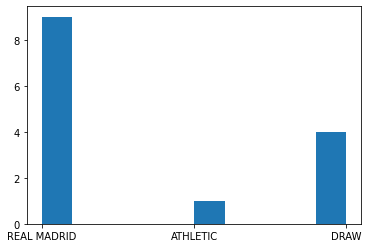

In [226]:
bar = [ match['Away Team'] if match['Winner'] == 1 else match['Home Team'] if  match['Winner'] == 0 else "DRAW" for index, match in castilla_vs_bascos.iterrows()]
plt.hist(bar)
plt.show()

#### We can expect from any classifier to "guess" Real-Madrid as a winner! 

In [227]:
teams = castilla_vs_bascos['Home Team'].unique()
teams.sort()

mapping = {team: index for index ,team in enumerate(teams) }
castilla_vs_bascos = castilla_vs_bascos.replace({'Home Team': mapping, 'Away Team': mapping})

In [228]:
from sklearn.model_selection import train_test_split

X, y = castilla_vs_bascos.iloc[:, :-1], castilla_vs_bascos.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=12 , shuffle=False)

### Logistic Regression

predict 2020 match outcomes

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

lgr = LogisticRegression()
lgr.fit(X_train,y_train)

print('Logistic Regression Accuracy: ', lgr.score(X_test,y_test),"\n")

y_pred = lgr.predict(X_test)

print("Logistic Regression Matrix:")
print( confusion_matrix(y_test,y_pred),"\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy:  1.0 

Logistic Regression Matrix:
[[1 0]
 [0 1]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



#### Let's use recent data (not in our dataset):

In [169]:
match_2021 = pd.DataFrame([[2021, 'REAL MADRID', 'ATHLETIC', 0 ], [2021, 'ATHLETIC', 'REAL MADRID', 1]],
                          columns=['year', "Home Team", "Away Team", "Winner"])
match_2021

,year,Home Team,Away Team,Winner
0,2021,REAL MADRID,ATHLETIC,0
1,2021,ATHLETIC,REAL MADRID,1


In [170]:
match_2021 = match_2021.replace({'Home Team': mapping, 'Away Team': mapping})

inv_map = {v: k for k, v in mapping.items()}

match_pred = match_2021.iloc[:, :-1]

y_pred = lgr.predict(match_pred)
match_pred['Winner'] = y_pred

match_2021 = match_2021.replace({'Home Team': inv_map, 'Away Team': inv_map})
match_pred = match_pred.replace({'Home Team': inv_map, 'Away Team': inv_map})

print("True:\n",  match_2021, '\n')
print("Prediction:\n" , match_pred )

True:
    year    Home Team    Away Team  Winner
0  2021  REAL MADRID     ATHLETIC       0
1  2021     ATHLETIC  REAL MADRID       1 

Prediction:
    year    Home Team    Away Team  Winner
0  2021  REAL MADRID     ATHLETIC     0.0
1  2021     ATHLETIC  REAL MADRID     1.0


## Sevilla vs Getafe

In [171]:
Sevilla_vs_Getafe = laliga[ ((laliga['Away Team']== 'SEVILLA FC') & (laliga['Home Team']== 'GETAFE')) | ((laliga['Home Team']== 'SEVILLA FC') & (laliga['Away Team']== 'GETAFE'))]
Sevilla_vs_Getafe = Sevilla_vs_Getafe[["year","Home Team", "Away Team", 'Winner']]

Sevilla_vs_Getafe

,year,Home Team,Away Team,Winner
27,2014,SEVILLA FC,GETAFE,0.0
216,2014,GETAFE,SEVILLA FC,0.0
463,2015,SEVILLA FC,GETAFE,0.0
652,2015,GETAFE,SEVILLA FC,2.0
1158,2017,GETAFE,SEVILLA FC,1.0
1347,2017,SEVILLA FC,GETAFE,2.0
1558,2018,SEVILLA FC,GETAFE,1.0
1846,2018,GETAFE,SEVILLA FC,0.0
1997,2019,SEVILLA FC,GETAFE,0.0
2148,2019,GETAFE,SEVILLA FC,1.0


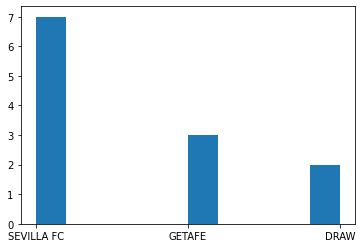

In [172]:
bar = [ match['Away Team'] if match['Winner'] == 1 else match['Home Team'] if  match['Winner'] == 0 else "DRAW" for index, match in Sevilla_vs_Getafe.iterrows()]
plt.hist(bar)
plt.show()

##### The data is balanced (slightly in favor of Sevilla)

In [173]:

teams = Sevilla_vs_Getafe['Home Team'].unique()
teams.sort()

mapping = {team: index for index ,team in enumerate(teams) }
Sevilla_vs_Getafe = Sevilla_vs_Getafe.replace({'Home Team': mapping, 'Away Team': mapping})

In [174]:
X, y = Sevilla_vs_Getafe.iloc[:, :-1], Sevilla_vs_Getafe.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10 , shuffle=False)

### Naive Bayes

In [175]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
print('Naive Bayes Accuracy : ', nb.score(X_test,y_test),"\n")

y_pred = nb.predict(X_test)

print("Naive Bayes Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy :  1.0 

Naive Bayes Matrix:
[[1 0]
 [0 1]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Since Naives Bayes is using probabilities (takes the class with the higher prob) and although that the data is balanced, 
the small difference biased the outcomes.


## How many goals will be scored in the following match:
#### Real Madrid VS VILLARREAL

In [176]:
laliga['Total goals'] = laliga['Home Team Goals'] + laliga['Away Team Goals']
laliga

,year,Home Team,Away Team,Home Team Goals,Away Team Goals,Winner,Home Team Points,Away Team Points,Total goals
0,2014,MALAGA,ATHLETIC,1,0,0.0,3.0,0.0,1
1,2014,SEVILLA FC,VALENCIA,1,1,2.0,1.0,1.0,2
2,2014,GRANADA,DEPORTIVO,2,1,0.0,3.0,0.0,3
3,2014,ALMERIA,ESPANYOL,1,1,2.0,1.0,1.0,2
4,2014,EIBAR,REAL SOCIEDAD,1,0,0.0,3.0,0.0,1
...,...,...,...,...,...,...,...,...,...
2655,2020,EIBAR,BARCELONA,0,1,1.0,0.0,3.0,1
2656,2020,REAL MADRID,VILLARREAL,2,1,0.0,3.0,0.0,3
2657,2020,OSASUNA,REAL SOCIEDAD,0,1,1.0,0.0,3.0,1
2658,2020,GRANADA,GETAFE,0,0,2.0,1.0,1.0,0


In [218]:
Real_Madrid_VS_VILLARREAL = laliga[ ((laliga['Away Team']== 'REAL MADRID') & (laliga['Home Team']== 'VILLARREAL')) | ((laliga['Home Team']== 'REAL MADRID') & (laliga['Away Team']== 'VILLARREAL'))]
Real_Madrid_VS_VILLARREAL = Real_Madrid_VS_VILLARREAL[["year","Home Team", "Away Team", 'Total goals']]


teams = Real_Madrid_VS_VILLARREAL['Home Team'].unique()
teams.sort()

mapping = {team: index for index ,team in enumerate(teams) }
Real_Madrid_VS_VILLARREAL = Real_Madrid_VS_VILLARREAL.replace({'Home Team': mapping, 'Away Team': mapping})

Real_Madrid_VS_VILLARREAL

,year,Home Team,Away Team,Total goals
51,2014,1,0,2
248,2014,0,1,2
529,2015,1,0,1
717,2015,0,1,3
802,2016,0,1,2
999,2016,1,0,5
1322,2017,0,1,1
1515,2017,1,0,4
1689,2018,1,0,4
1877,2018,0,1,5


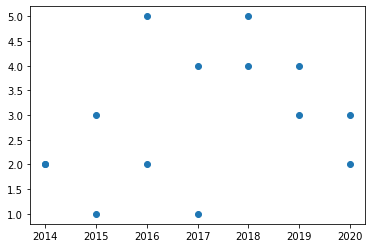

In [178]:
plt.scatter(Real_Madrid_VS_VILLARREAL['year'], Real_Madrid_VS_VILLARREAL['Total goals'])
plt.show()

### Linear Regression
without "year" feature - predict 2020 results

In [185]:
from sklearn.linear_model import LinearRegression
X, y = Real_Madrid_VS_VILLARREAL.iloc[:, 1:-1], Real_Madrid_VS_VILLARREAL.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=12 , shuffle=False)

reg = LinearRegression()
reg.fit(X_train,y_train)
# print('Naive Bayes Accuracy : ', reg.score(X_test,y_test),"\n")

y_pred = np.round(reg.predict(X_test))
y_pred

array([3., 3.])

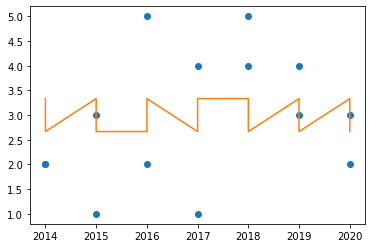

In [187]:
plt.plot(Real_Madrid_VS_VILLARREAL['year'], y, 'o')
plt.plot(Real_Madrid_VS_VILLARREAL['year'], reg.predict(X))
plt.show()

Without the years dependency the linear regression line is around 3. 

The classifer sees only the teams and the result, there is no any logic so the classifier guess the average:

In [191]:
Real_Madrid_VS_VILLARREAL['Total goals'].mean()

2.9285714285714284

### Linear Regression
with "year" feature - predict 2020 results

In [192]:
X, y = Real_Madrid_VS_VILLARREAL.iloc[:, :-1], Real_Madrid_VS_VILLARREAL.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=12 , shuffle=False)

reg = LinearRegression()
reg.fit(X_train,y_train)
# print('Naive Bayes Accuracy : ', reg.score(X_test,y_test),"\n")

y_pred = np.round(reg.predict(X_test))
y_pred

array([5., 4.])

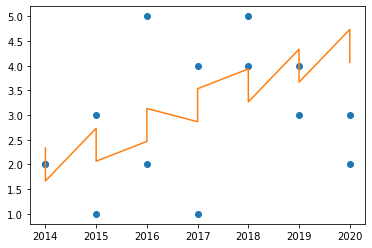

In [193]:
plt.plot(Real_Madrid_VS_VILLARREAL['year'], y, 'o')
plt.plot(Real_Madrid_VS_VILLARREAL['year'], reg.predict(X))
plt.show()

With the years dependency, we can see that over the years there is an increasing of the total goals.

So the linear regression expect there will be a significant amount of goals in the next years as well.  


# Prediction of each team in 2020\2021 season. 
In which part of the table each team will finish ?

Will she go to champions leauge? will she go to "La Segunda"?

In [196]:
final_points_home = laliga.groupby(by=['year','Home Team']).agg({'Home Team Points':'sum'}).reset_index()
final_points_away = laliga.groupby(by=['year','Away Team']).agg({'Away Team Points':'sum'}).reset_index()

final_points = final_points_home.merge(final_points_away, left_on=['year','Home Team'], right_on=['year','Away Team'])

final_points['points'] = final_points['Home Team Points'] + final_points['Away Team Points']
final_points = final_points[['year','Home Team', 'points']]
final_points.rename({'Home Team':'Team'})
final_points = final_points.sort_values(by =['year','points'], ascending=True)
final_points

,year,Home Team,points
5,2014,CORDOBA,20.0
0,2014,ALMERIA,32.0
6,2014,DEPORTIVO,35.0
7,2014,EIBAR,35.0
11,2014,GRANADA,35.0
...,...,...,...
135,2020,REAL SOCIEDAD,62.0
136,2020,SEVILLA FC,77.0
123,2020,BARCELONA,79.0
134,2020,REAL MADRID,84.0


In [220]:
final_status = pd.DataFrame()
for year in range(2014,2021):
    temp = final_points[final_points['year']==year].reset_index(drop=True)
    temp.loc[0:2,'pred'] =0
    temp.loc[16:19,'pred'] =2
    temp.loc[3:15 , 'pred']= 1
    final_status = final_status.append(temp)
    
    
final_status.reset_index(drop=True)    

teams = final_status['Home Team'].unique()
teams.sort()

mapping = {team: index for index ,team in enumerate(teams) }
final_status = final_status.replace({'Home Team': mapping})
final_status


,year,Home Team,points,pred
0,2014,7,20.0,0.0
1,2014,1,32.0,0.0
2,2014,8,35.0,0.0
3,2014,9,35.0,1.0
4,2014,15,35.0,1.0
...,...,...,...,...
15,2020,26,62.0,1.0
16,2020,27,77.0,2.0
17,2020,4,79.0,2.0
18,2020,25,84.0,2.0


In [211]:
X, y = final_status.iloc[:, :-1], final_status.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=120 , shuffle=False)

# Adaboost
using Decision Tree of depth 1

In [212]:
from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier()
adb.fit(X_train,y_train)
print('AdaBoost Accuracy : ', adb.score(X_test,y_test),"\n")

y_pred = adb.predict(X_test)

print("AdaBoost Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

AdaBoost Accuracy :  0.6 

AdaBoost Matrix:
[[ 2  1  0]
 [ 3 10  0]
 [ 0  4  0]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50         3
         1.0       0.67      0.77      0.71        13
         2.0       0.00      0.00      0.00         4

    accuracy                           0.60        20
   macro avg       0.36      0.48      0.40        20
weighted avg       0.49      0.60      0.54        20



C:\Users\Samuel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samuel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samuel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision tree

In [215]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('Decision Tree Accuracy : ', dt.score(X_test,y_test),"\n")

y_pred = dt.predict(X_test)

print("Decision Tree Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy :  0.85 

Decision Tree Matrix:
[[ 3  0  0]
 [ 1 10  2]
 [ 0  0  4]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.77      0.87        13
         2.0       0.67      1.00      0.80         4

    accuracy                           0.85        20
   macro avg       0.81      0.92      0.84        20
weighted avg       0.90      0.85      0.85        20



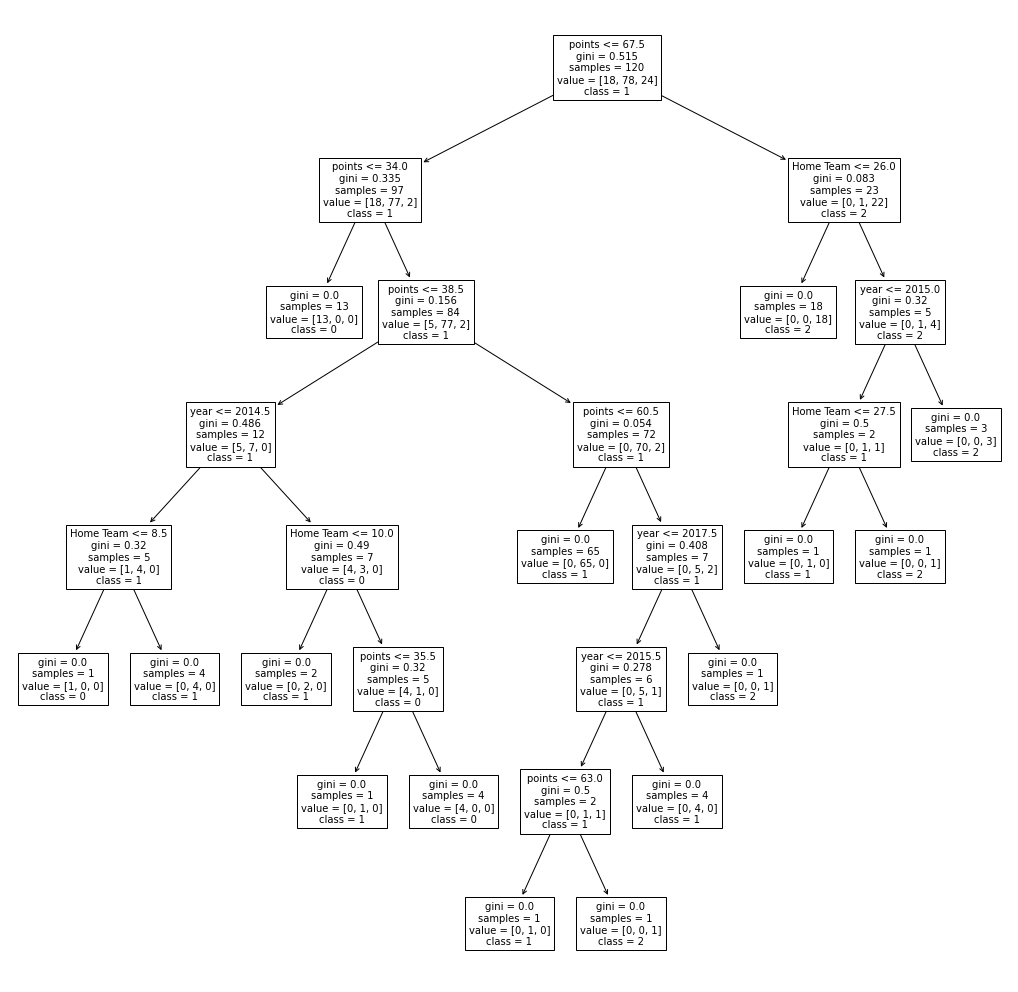

In [216]:
plt.figure(figsize=(18,18))  # set plot size (denoted in inches)
plot_tree(dt, feature_names=X.columns, class_names = ['0','1', '2'], fontsize=10)
plt.show()

## Adaboost
using Decision Tree of depth 3

In [210]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3) ,n_estimators=50)
adaboost.fit(X_train,y_train)
print('AdaBoost Accuracy : ', adaboost.score(X_test,y_test),"\n")

y_pred = adaboost.predict(X_test)

print("AdaBoost Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

AdaBoost Accuracy :  0.9 

AdaBoost Matrix:
[[ 3  0  0]
 [ 2 11  0]
 [ 0  0  4]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       1.00      0.85      0.92        13
         2.0       1.00      1.00      1.00         4

    accuracy                           0.90        20
   macro avg       0.87      0.95      0.89        20
weighted avg       0.94      0.90      0.91        20



" טובים השניים מן האחד "